In [2]:
import pandas as pd
import seaborn as sns
import sys
import os
import matplotlib.pyplot as plt
pd.options.display.max_columns = None
pd.options.display.max_rows = 100
os.chdir('/fast/work/groups/ag_kircher/ReMM/MA_Lusi/Snakemake')

In [6]:
a = '1'
sys.getsizeof(a) 

50

### DataPrep

In [2]:
df19 = pd.read_csv('output/features/annotated/hg19/SNVs.hg19.combined.txt.gz', sep = '\t',header = None)
df38 = pd.read_csv('output/features/annotated/hg38/SNVs.hg38.combined.txt.gz', sep = '\t',header = None)
lift= pd.read_csv('output/predictions/lifted/new/hg38.predictions.lifted.txt', sep = '\t',header = None)


df38.index= df38[1].astype(str)+'-'+(df38[2]).astype(str)
df19.index= df19[1].astype(str)+'-'+(df19[2]).astype(str)
#print(df19.memory_usage().sum()/a,df38.memory_usage().sum()/a,lift.memory_usage().sum()/a)

col = pd.read_csv('input/variants/hg38/SNVs.hg38.positive.annotated.tsv.gz', sep = '\t')
#df38 = df38.drop(columns = [0])
df38.columns  = ['Score']+col.columns.str.strip().to_list()


col = pd.read_csv('input/variants/hg19/SNVs.hg19.positive.annotated.tsv.gz', sep = '\t')
#df19 = df19.drop(columns = [0])

df19.columns  = ['Score']+col.columns.str.strip().to_list()

df19.columns = df19.columns.str.replace('46way','')
df19.columns = df19.columns.str.replace('fantom','Fantom')

df38 = df38.fillna(0)
df19 = df19.fillna(0)

p = lift[2].str.split(':', expand = True)[1].astype(int)
lift.index = lift[2].str.split(':', expand = True)[0]+'-'+p.astype(str)

f = df38.join(lift,lsuffix='_38',rsuffix='_lift',how='inner')
f.index= f[0].astype(str)+'-'+(f[1]).astype(str)

ff = f.join(df19,lsuffix='_38',rsuffix='_19',how='inner')


In [6]:
ff.head()

,Score_38,CHR_38,POSITION_38,ID,CpGperGC_38,CpGperCpG_38,CpGobsExp_38,priPhyloP_38,verPhastCons_38,mamPhastCons_38,EncH3K27Ac_38,EncH3K4Me1_38,EncH3K4Me3_38,DnaseClusteredHyp_38,DnaseClusteredScore_38,Fantom5Perm_38,GerpRS_38,GerpRSpv_38,rareVar_38,commonVar_38,fracRareCommon_38,dbVARCount_38,numTFBSConserved_38,GCContent_38,priPhastCons_38,verPhyloP_38,mamPhyloP_38,ISCApath_38,DGVCount_38,Fantom5Robust_38,0,1,2,Score_19,CHR_19,POSITION_19,CpGobsExp_19,CpGperCpG_19,CpGperGC_19,DGVCount_19,DnaseClusteredHyp_19,DnaseClusteredScore_19,EncH3K27Ac_19,EncH3K4Me1_19,EncH3K4Me3_19,GCContent_19,GerpRS_19,GerpRSpv_19,ISCApath_19,commonVar_19,dbVARCount_19,Fantom5Perm_19,Fantom5Robust_19,fracRareCommon_19,mamPhastCons_19,mamPhyloP_19,numTFBSConserved_19,priPhastCons_19,priPhyloP_19,rareVar_19,verPhastCons_19,verPhyloP_19
chr1-100000176,0,chr1,99534620,.,0.0,0.0,0.0,-1.460,0.000,0.002,13.36,4.12,1.00,28.0,777.0,0.0,639.26,0.000000,43.0,2.0,0.956,10.0,1.0,0.437,0.526,-2.483,-1.066,8.0,1.0,0.0,chr1,100000176,chr1:99534620:0.038656:0,0,chr1,100000176,0.0,0.0,0.0,1.0,18.0,600.0,10.00,21.56,6.68,0.437,364.4,0.0,6.0,2.0,1.0,0.0,0.0,0.889,0.000,-2.155,0.0,0.361,-1.914,16.0,0.000,-1.609
chr1-10000026,0,chr1,9939968,.,0.0,0.0,0.0,-0.410,0.026,0.026,1.92,4.00,3.00,0.0,0.0,0.0,0.00,0.000000,253.0,7.0,0.973,28.0,0.0,0.523,0.013,-0.524,-0.362,20.0,0.0,0.0,chr1,10000026,chr1:9939968:0.000333333:0,0,chr1,10000026,0.0,0.0,0.0,0.0,0.0,0.0,2.00,5.00,13.24,0.523,0.0,0.0,13.0,4.0,0.0,0.0,0.0,0.862,0.035,-1.404,0.0,0.035,-1.489,25.0,0.040,-1.286
chr1-100000432,0,chr1,99534876,.,0.0,0.0,0.0,-0.165,0.007,0.030,10.08,2.00,4.44,0.0,0.0,0.0,90.88,0.000004,41.0,3.0,0.932,10.0,0.0,0.371,0.199,0.249,-0.105,8.0,1.0,0.0,chr1,100000432,chr1:99534876:0.0215794:0,0,chr1,100000432,0.0,0.0,0.0,1.0,0.0,0.0,5.00,11.76,4.28,0.371,0.0,0.0,6.0,3.0,1.0,0.0,0.0,0.833,0.003,0.050,0.0,0.106,-0.187,15.0,0.015,0.146
chr1-10000069,0,chr1,9940011,.,0.0,0.0,0.0,-1.433,0.002,0.007,1.92,1.88,2.00,0.0,0.0,0.0,0.00,0.000000,238.0,6.0,0.975,28.0,0.0,0.517,0.003,-1.665,-1.416,20.0,0.0,0.0,chr1,10000069,chr1:9940011:0.000333333:0,0,chr1,10000069,0.0,0.0,0.0,0.0,0.0,0.0,2.88,4.76,14.44,0.517,0.0,0.0,13.0,3.0,0.0,0.0,0.0,0.906,0.015,-1.157,0.0,0.016,-1.160,29.0,0.018,-1.110
chr1-100000837,0,chr1,99535281,.,0.0,0.0,0.0,-0.805,0.000,0.008,5.16,8.36,2.92,0.0,0.0,0.0,0.00,0.000000,36.0,7.0,0.837,10.0,1.0,0.371,0.042,0.048,-0.821,8.0,1.0,0.0,chr1,100000837,chr1:99535281:0:0,0,chr1,100000837,0.0,0.0,0.0,1.0,0.0,0.0,4.56,16.40,5.56,0.371,0.0,0.0,6.0,7.0,1.0,0.0,0.0,0.720,0.000,-0.233,1.0,0.011,-0.744,18.0,0.000,-0.227


In [10]:


col = ['CpGperGC', 'CpGperCpG', 'CpGobsExp','GCContent','EncH3K27Ac', 'EncH3K4Me1',
       'EncH3K4Me3', 'verPhyloP', 'mamPhyloP',
       'priPhyloP','priPhastCons', 'mamPhastCons','verPhastCons', 'DnaseClusteredHyp', 'DnaseClusteredScore', 
         'Fantom5Perm','Fantom5Robust','GerpRS', 'GerpRSpv', 'rareVar', 'commonVar', 'fracRareCommon',
        'numTFBSConserved',
       'ISCApath', 'DGVCount', 'dbVARCount']

len(col)


26

In [ ]:
ff.iloc[:,ff.columns.str.contains('Score',na = False)].corr()

In [ ]:
ff.to_csv('output/predictions/lifted/new/hg38.hg19.features.combined.all.csv.gz',compression='zip', sep = '\t' )

In [17]:
ff.head()

,Score_38,CHR_38,POSITION_38,ID,CpGperGC_38,CpGperCpG_38,CpGobsExp_38,priPhyloP_38,verPhastCons_38,mamPhastCons_38,EncH3K27Ac_38,EncH3K4Me1_38,EncH3K4Me3_38,DnaseClusteredHyp_38,DnaseClusteredScore_38,Fantom5Perm_38,GerpRS_38,GerpRSpv_38,rareVar_38,commonVar_38,fracRareCommon_38,dbVARCount_38,numTFBSConserved_38,GCContent_38,priPhastCons_38,verPhyloP_38,mamPhyloP_38,ISCApath_38,DGVCount_38,Fantom5Robust_38,0,1,2,Score_19,CHR_19,POSITION_19,CpGobsExp_19,CpGperCpG_19,CpGperGC_19,DGVCount_19,DnaseClusteredHyp_19,DnaseClusteredScore_19,EncH3K27Ac_19,EncH3K4Me1_19,EncH3K4Me3_19,GCContent_19,GerpRS_19,GerpRSpv_19,ISCApath_19,commonVar_19,dbVARCount_19,Fantom5Perm_19,Fantom5Robust_19,fracRareCommon_19,mamPhastCons_19,mamPhyloP_19,numTFBSConserved_19,priPhastCons_19,priPhyloP_19,rareVar_19,verPhastCons_19,verPhyloP_19
chr1-100000176,0,chr1,99534620,.,0.0,0.0,0.0,-1.460,0.000,0.002,13.36,4.12,1.00,28.0,777.0,0.0,639.26,0.000000,43.0,2.0,0.956,10.0,1.0,0.437,0.526,-2.483,-1.066,8.0,1.0,0.0,chr1,100000176,chr1:99534620:0.038656:0,0,chr1,100000176,0.0,0.0,0.0,1.0,18.0,600.0,10.00,21.56,6.68,0.437,364.4,0.0,6.0,2.0,1.0,0.0,0.0,0.889,0.000,-2.155,0.0,0.361,-1.914,16.0,0.000,-1.609
chr1-10000026,0,chr1,9939968,.,0.0,0.0,0.0,-0.410,0.026,0.026,1.92,4.00,3.00,0.0,0.0,0.0,0.00,0.000000,253.0,7.0,0.973,28.0,0.0,0.523,0.013,-0.524,-0.362,20.0,0.0,0.0,chr1,10000026,chr1:9939968:0.000333333:0,0,chr1,10000026,0.0,0.0,0.0,0.0,0.0,0.0,2.00,5.00,13.24,0.523,0.0,0.0,13.0,4.0,0.0,0.0,0.0,0.862,0.035,-1.404,0.0,0.035,-1.489,25.0,0.040,-1.286
chr1-100000432,0,chr1,99534876,.,0.0,0.0,0.0,-0.165,0.007,0.030,10.08,2.00,4.44,0.0,0.0,0.0,90.88,0.000004,41.0,3.0,0.932,10.0,0.0,0.371,0.199,0.249,-0.105,8.0,1.0,0.0,chr1,100000432,chr1:99534876:0.0215794:0,0,chr1,100000432,0.0,0.0,0.0,1.0,0.0,0.0,5.00,11.76,4.28,0.371,0.0,0.0,6.0,3.0,1.0,0.0,0.0,0.833,0.003,0.050,0.0,0.106,-0.187,15.0,0.015,0.146
chr1-10000069,0,chr1,9940011,.,0.0,0.0,0.0,-1.433,0.002,0.007,1.92,1.88,2.00,0.0,0.0,0.0,0.00,0.000000,238.0,6.0,0.975,28.0,0.0,0.517,0.003,-1.665,-1.416,20.0,0.0,0.0,chr1,10000069,chr1:9940011:0.000333333:0,0,chr1,10000069,0.0,0.0,0.0,0.0,0.0,0.0,2.88,4.76,14.44,0.517,0.0,0.0,13.0,3.0,0.0,0.0,0.0,0.906,0.015,-1.157,0.0,0.016,-1.160,29.0,0.018,-1.110
chr1-100000837,0,chr1,99535281,.,0.0,0.0,0.0,-0.805,0.000,0.008,5.16,8.36,2.92,0.0,0.0,0.0,0.00,0.000000,36.0,7.0,0.837,10.0,1.0,0.371,0.042,0.048,-0.821,8.0,1.0,0.0,chr1,100000837,chr1:99535281:0:0,0,chr1,100000837,0.0,0.0,0.0,1.0,0.0,0.0,4.56,16.40,5.56,0.371,0.0,0.0,6.0,7.0,1.0,0.0,0.0,0.720,0.000,-0.233,1.0,0.011,-0.744,18.0,0.000,-0.227


### compare with cadd

In [ ]:
#ra = ff[ff['GerpRS_38']!=0.0].sample(100000,random_state = 23421)
ra = ff.sample(70000,random_state = 23421)

ra = ra.reset_index().drop_duplicates(subset = 'index').set_index('index')
#ra.to_csv('ra.csv',header = True, index = True, sep = '\t')

d19 = pd.DataFrame()
d19['#CHROM'] = pd.Series(ra.index).str.split('-',expand = True)[0]
d19['POS'] = pd.Series(ra.index).str.split('-',expand = True)[1]
d19[['ID', 'REF', 'ALT', 'QUAL', 'FILTER', 'INFO']]=[".","T","A",".","PASS","."]
d19 = d19.T.reset_index().T
d19.columns = ['##fileformat=VCFv4.1']+ ['']*(d19.shape[1]-1)
d19.to_csv('chr5.pos19.vcf',header=True,index = False, sep = '\t')

d38 = pd.DataFrame()
d38['#CHROM'] = ra['CHR_38']
d38['POS'] = ra['POSITION_38']
d38[['ID', 'REF', 'ALT', 'QUAL', 'FILTER', 'INFO']]=[".","T","A",".","PASS","."]
d38 = d38.T.reset_index().T
d38.columns = ['##fileformat=VCFv4.1']+ ['']*(d38.shape[1]-1)
d38.to_csv('chr5.pos38.vcf',header=True,index = False, sep = '\t')
d38.head()

In [ ]:
c19 = pd.read_csv('cadd19.txt',sep = '\t',skiprows = 1)
c19['index']='chr'+c19['#Chrom'].astype(str)+'-'+c19['Pos'].astype(str)
c19 = c19.set_index(['index'])
c19.columns = c19.columns+'_cadd19'
c19.shape
c38 = pd.read_csv('cadd38.txt1',sep = '\t',skiprows = 1)
c38['index']='chr'+c38['#Chrom'].astype(str)+'-'+c38['Pos'].astype(str)
c38 = c38.set_index(['index'])
c38.columns = c38.columns+'_cadd38'


c19 = c19.reset_index().drop_duplicates(subset = 'index').set_index('index')
c38 = c38.reset_index().drop_duplicates(subset = 'index').set_index('index')
c19.shape

In [ ]:
c38.shape

In [ ]:

l = pd.Series(['GC','CpG','GerpRS','EncH3K27Ac','EncH3K4Me1','EncH3K4Me3'])+'_cadd19'
#df = c19[l].join(ra,how='inner')
df = c19.join(ra,how='inner')

c19.shape


In [ ]:
df['index'] = df['CHR_38']+'-'+df['POSITION_38'].astype(str)
df = df.set_index(['index'])
df.shape

In [ ]:
l = pd.Series(['GC','CpG','GerpRS','EncodeH3K27ac-max','EncodeH3K4me1-max','EncodeH3K4me3-max'])+'_cadd38'
#df = c38[l].join(df,how='inner')
df = c38.join(df,how='inner')

df.shape

In [ ]:
cadd = df.loc[:,df.columns.str.contains('cadd', na=False)]
cadd.columns = cadd.columns.str.replace('Encode','Enc')
cadd.columns = cadd.columns.str.replace('Me','me')

In [ ]:
cadd.head()

In [ ]:
cadd.loc[:,cadd.columns.str.contains('EncH3K4me')].corr()

In [ ]:
cadd.loc[:,cadd.columns.str.contains('Gerp')].corr()

In [ ]:
def get_table(df,name):
    d = df.loc[:,df.columns.str.contains(name,na = False)].corr()
    
    d = d.loc[:,d.columns.str.contains('38')]

    d.columns = d.columns.str.replace('38','')
    d = d.loc[d.index.str.contains('19'),:]
    d.index = d.index.str.replace('19','')
    #l = d.columns.to_list()
    #d.loc[l,l]
    
    return d
    
    
    

get_table(cadd,'CG')

In [ ]:
df.loc[:,df.columns.str.contains('me1|Me1',na = False)].corr()


In [ ]:
corr = df.corr()
l = corr.columns.str.contains('Me1|me1',na = False)


In [ ]:
corr.loc[l,l]

In [ ]:
l = corr.columns.str.contains('Me3|me3',na = False)
corr.loc[l,l]

In [ ]:
df.loc[:,df.columns.str.contains('Cons',na = False)].corr()

In [ ]:
ff.loc[:,ff.columns.str.contains('Cons',na = False)].corr()

In [ ]:
c = 'Enc'
cc = ff.columns.str.contains(c,na = False)
ff.loc[:,cc].corr()
for c in df19.columns[2:]:
    cc = ff.columns.str.contains(c,na = False)

    #print((ff.iloc[:,cc].corr()))

In [ ]:
l = []
for col in df19.columns[2:]:
    a = (df19[col]==0).sum()+df19[col].isna().sum()
    b = (df38[col]==0).sum()+df38[col].isna().sum()
    cc = ff.columns.str.contains(col,na = False)
    c = ff.iloc[:,cc].corr().iloc[0,1]
    l.append([c,col,a/len(df19),b/len(df38)])
dd = pd.DataFrame(l)
dd.columns = ['Correlation','Features', 'NaN (0) in hg19','NaN (0) in hg38']


In [ ]:
dd.columns = ['Correlation','Features', 'NaN (0) in hg19','NaN (0) in hg38']
dd.to_csv('figures/nans.txt', sep = '\t')

### Heatmaps

In [4]:
#ff = pd.read_csv('output/predictions/lifted/last/ff.txt.gz', sep = '\t',index_col = 'Unnamed: 0',compression = 'gzip') 

f = ff.drop(columns = ['Score_38','Score_19','CHR_38','CHR_19','ID','POSITION_38','POSITION_19'])



In [ ]:
f.iloc[:,f.columns.str.contains('_38',na = False)]

In [5]:

d38 = f.iloc[:,f.columns.str.contains('_38',na = False)]
d19 = f.iloc[:,f.columns.str.contains('_19',na = False)]
d38.columns = d38.columns.str.replace('_38','')
d19.columns = d19.columns.str.replace('_19','')

df = pd.DataFrame((d38 ==0).astype(int).sum(axis=0))/len(d38)*100
d1 = pd.DataFrame((d19 == 0).astype(int).sum(axis=0))/len(d19)*100


d2 = df.join(d1,lsuffix = 'GRCh38', rsuffix = 'GRCh19')
d2.columns = d2.columns.str[1:]
d2

d2.applymap("{0:.2f}%".format).to_latex('figures/nan.tex', index = True,column_format = 'lll')


In [7]:
d2.columns = ['GRCh38','GRCh37']
d2 = d2[['GRCh37','GRCh38']]

,GRCh38,GRCh19
CpGperGC,99.418672,99.431590
CpGperCpG,99.418672,99.431590
CpGobsExp,99.418672,99.431590
priPhyloP,0.477964,0.870000
verPhastCons,54.149916,46.165679
mamPhastCons,33.130081,47.833034
EncH3K27Ac,0.298524,2.535950
EncH3K4Me1,0.298524,1.914085
EncH3K4Me3,0.298524,0.980708
DnaseClusteredHyp,84.339062,83.246762


In [5]:
corr_matrix = f.iloc[:,:].corr()
c = corr_matrix.columns
corr_matrix = corr_matrix.loc[c,c]
corr_matrix.to_csv('figures/correlation.txt',sep = '\t')

In [ ]:
#corr_matrix.index.str.contains('_19').str.replace('_19')

In [11]:
corr_matrix = pd.read_csv('figures/correlation.txt',sep = '\t',index_col = 'Unnamed: 0' )
#corr_matrix

In [12]:
corr = corr_matrix.loc[corr_matrix.index.str.contains('_19',na = False),corr_matrix.columns.str.contains('_38',na = False)]



In [13]:
l = corr.columns[corr.columns.str.contains('_38')].str.replace('_38','')
ll = corr.index[corr.index.str.contains('_19')].str.replace('_19','')
corr.columns = l
corr.index = ll
corr  = corr.loc[l,l]

In [14]:
l = []
for i in range(len(corr)):
    l.append([corr.columns[i],corr.iloc[i,i]])

In [15]:
corr = corr.loc[col,col]

In [ ]:
#corr_matrix.to_csv('figures/correlation.txt',sep = '\t')

In [ ]:
#ff.head()
c = 'Enc|CHR_38|POSITION_38'
cc = ff.columns.str.contains(c,na = False)
ff.loc['chr11-17437008',cc]


In [ ]:
corr_matrix = ff.corr()
corr_matrix.to_csv('output/predictions/lifted/new/hg38.hg19.corr_matrix.txt', sep = '\t')

In [16]:
l=corr_matrix.columns.str.contains('38',na =False) 
cor38 = corr_matrix.loc[l,l]
cor38.columns=cor38.columns.str.replace('_38','')
cor38.index=cor38.index.str.replace('_38','')
cor38 = cor38.loc[col,col]

In [16]:
cor38.iloc[:,17:].to_latex('figures/corr38.tex')

In [50]:
cor38.to_latex('figures/corr38.tex')

In [21]:
c = 'PhastCons|Phy'
c = 'Enc'
cc = cor38.columns.str.contains(c)
cons = cor38.iloc[cc,cc]
cons

,EncH3K27Ac,EncH3K4Me1,EncH3K4Me3
EncH3K27Ac,1.000000,0.389949,0.816400
EncH3K4Me1,0.389949,1.000000,0.346826
EncH3K4Me3,0.816400,0.346826,1.000000


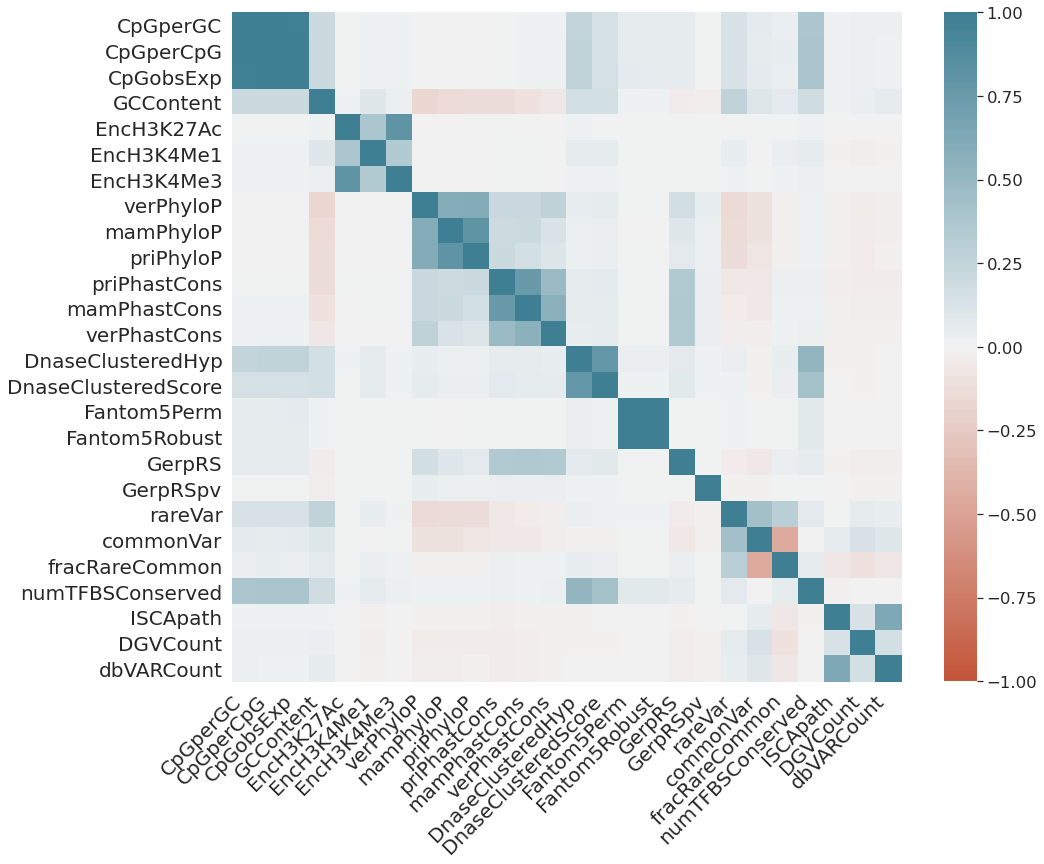

In [32]:
def plot_heatmap(cor38,name)   : 
    x = 2.5
    fig, ax = plt.subplots(figsize=(15,15))  
    sns.set(font_scale=1.5)

    ax = sns.heatmap(
        cor38, 
        vmin=-1, vmax=1, center=0,
        cmap=sns.diverging_palette(20, 220, n=200),
        square=True,xticklabels = 1,yticklabels=1,cbar=True, cbar_kws={"shrink": .82}
    )
    ax.set_xticklabels(
        ax.get_xticklabels(),
        rotation=45,
        horizontalalignment='right'
    )
    ax.tick_params(axis='both',  labelsize=8*x)
    ;
    plt.savefig("figures/"+name+".png", dpi = 50,bbox_inches = "tight")
plot_heatmap(cor38,'heatmap38')  

In [ ]:
#cor38.to_csv('figures/correlation38.txt',sep = '\t')
#cor38.to_latex('figures/corr38.tex', index = True,column_format = 'lll')

#cor19.to_csv('figures/correlation19.txt',sep = '\t')
#cor19.to_latex('figures/corr19.tex', index = True,column_format = 'lll')


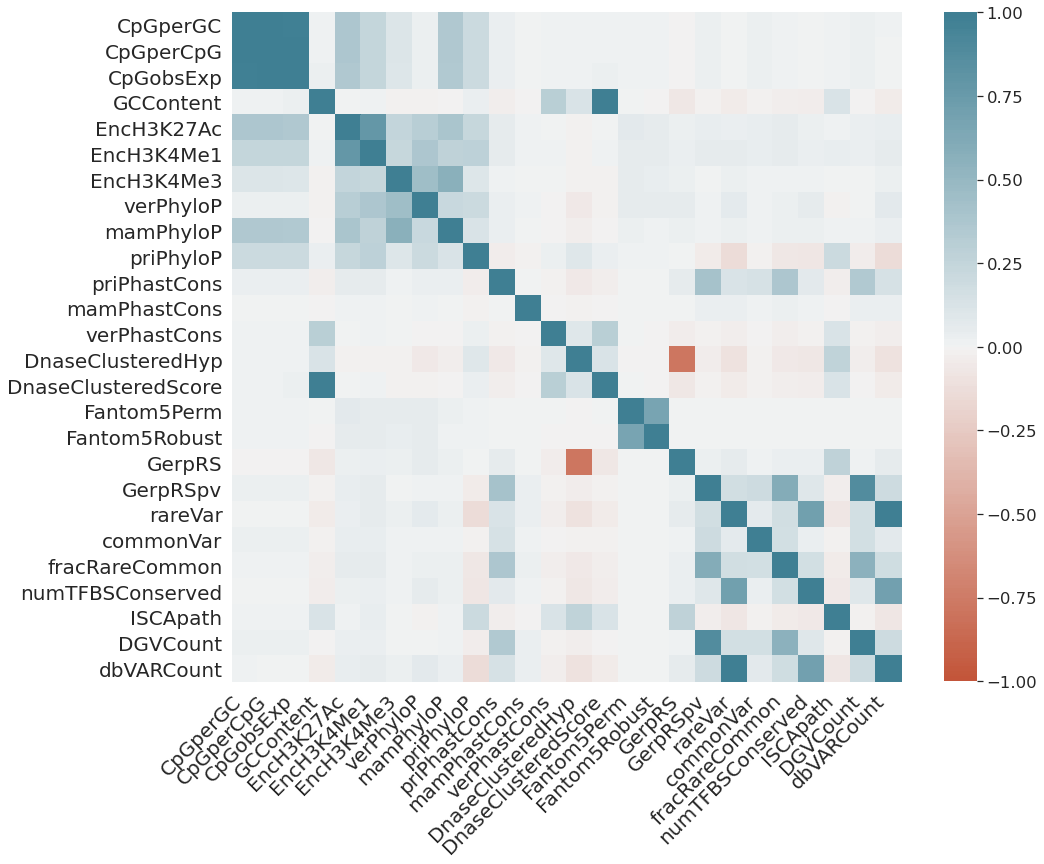

In [33]:
ll= corr_matrix.columns.str.contains('19',na =False)
cor19 = corr_matrix.loc[ll,ll]
cor19.columns=cor38.columns.str.replace('_19','')
cor19.index=cor38.index.str.replace('_19','')
cor19 = cor19.loc[col,col]
plot_heatmap(cor19,'heatmap19')  

In [ ]:
ff.shape

In [18]:
l=corr_matrix.columns.str.contains('38',na =False)
ll= corr_matrix.columns.str.contains('19',na =False)
corr = corr_matrix.loc[l,ll]

corr.columns = corr.columns.str.replace('_19|_38','')
corr.index = corr.index.str.replace('_19|_38','')

corr = corr.loc[:,corr.index]
corr = corr.loc[col,col]
#plot_heatmap(corr,'heatmap')  

corr.to_latex('figures/corr.tex')

In [20]:
corr.iloc[:,:8].to_latex('figures/corr1.tex')
corr.iloc[:,8:17].to_latex('figures/corr2.tex')
corr.iloc[:,17:].to_latex('figures/corr3.tex')

### Random

In [26]:
r38 = 'output/predictions/random/hg38.random.vcf.gz'
r38 = pd.read_csv(r38, sep = '\t',skiprows = 2,header = None)

r19 = 'output/predictions/random/hg38.random.bed.gz'
r19 = pd.read_csv(r19, sep = '\t',skiprows = 2,header = None)

In [27]:
r19[0].value_counts()

chr1     9599
chr2     9408
chr3     7531
chr4     7278
chr5     7054
chr6     6612
chrX     6215
chr7     6142
chr8     5547
chr9     5476
chr11    5293
chr10    5151
chr12    5107
chr13    4434
chr14    4208
chr15    3864
chr16    3497
chr17    3226
chr18    3143
chr20    2481
chr19    2218
chrY     2162
chr22    1994
chr21    1891
Name: 0, dtype: int64